# This script contains the followings:
- Importing libraries and data and renaming columns
- The elbow technique
- k-means clustering

# Import libraries & load dataset

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [47]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [83]:
# Define full absolute paths
path = r'/Users/macbook/Dropbox/Mac/Documents/Pro/Data Analyst/Course_Career foundry/A6_Data immersion/02_data'
file_path = os.path.join(path,'prepared_data','transactions_V4')

# Load file from pickle
df = pd.read_pickle(file_path)

In [49]:
df.shape

(7449536, 16)

# Elbow technique


In [84]:
df.columns

Index(['id_transaction', 'date_transaction', 'year', 'price', 'price_m2',
       'id_city', 'city', 'postcode', 'adresse', 'departement',
       'building_type', 'vefa', 'n_rooms', 'living_area', 'latitude',
       'longitude'],
      dtype='object')

In [85]:
round(df.describe())

,id_transaction,date_transaction,year,price,price_m2,id_city,postcode,n_rooms,living_area,latitude,longitude
count,7449536.0,7449536,7449536.0,7449536.0,7449536.0,7449536.0,7449536.0,7449536.0,7449536.0,7449536.0,7449536.0
mean,6723584.0,2018-10-24 23:29:56.644301056,2018.0,219058.0,2925.0,209.0,53295.0,4.0,82.0,46.0,2.0
min,2.0,2014-01-01 00:00:00,2014.0,5500.0,577.0,1.0,1000.0,0.0,9.0,-21.0,-63.0
25%,3306694.0,2016-10-06 00:00:00,2016.0,112000.0,1548.0,71.0,31300.0,2.0,53.0,45.0,1.0
50%,6686340.0,2018-12-14 00:00:00,2018.0,171000.0,2353.0,167.0,56400.0,3.0,76.0,47.0,2.0
75%,10182264.0,2020-12-23 00:00:00,2020.0,262000.0,3594.0,300.0,77127.0,4.0,101.0,49.0,5.0
max,13067339.0,2022-12-31 00:00:00,2022.0,17865830.0,14100.0,909.0,97490.0,112.0,1640.0,51.0,56.0
std,3899116.0,NaN,2.0,191507.0,2079.0,173.0,27687.0,2.0,42.0,6.0,6.0


In [86]:
df.head()

,id_transaction,date_transaction,year,price,price_m2,id_city,city,postcode,adresse,departement,building_type,vefa,n_rooms,living_area,latitude,longitude
0,332948,2014-01-02,2014,173020.0,2403.055556,202,LAGNIEU,1150,21 GR GRANDE RUE DE BULLIEZ,01,Maison,False,4,72,45.899056,5.354210
1,328900,2014-01-02,2014,157500.0,1529.126214,451,VIRIAT,1440,1369 RTE DE STRASBOURG,01,Maison,False,4,103,46.236407,5.262935
2,326170,2014-01-02,2014,112000.0,1435.897436,365,SAINT-JEAN-SUR-VEYLE,1290,5174 SAINT JEAN SUR VEYLE,01,Maison,False,3,78,46.260087,4.918587
3,328585,2014-01-02,2014,197000.0,2345.238095,427,TREVOUX,1600,6346 MTE DES LILAS,01,Appartement,False,4,84,45.942301,4.770694
4,335040,2014-01-03,2014,126000.0,1135.135135,283,OYONNAX,1100,29B RUE DE LA FORGE,01,Appartement,False,4,111,46.258411,5.640810


In [77]:
# keeping only columns with numerical values
df_num = df[['id_transaction', 'year', 'price', 'price_m2',
       'id_city', 'postcode', 'departement',
     'n_rooms', 'living_area', 'latitude',
       'longitude']]
df_num.head()

,id_transaction,year,price,price_m2,id_city,postcode,departement,n_rooms,living_area,latitude,longitude
0,332948,2014,173020.0,2403.055556,202,1150,01,4,72,45.899056,5.354210
1,328900,2014,157500.0,1529.126214,451,1440,01,4,103,46.236407,5.262935
2,326170,2014,112000.0,1435.897436,365,1290,01,3,78,46.260087,4.918587
3,328585,2014,197000.0,2345.238095,427,1600,01,4,84,45.942301,4.770694
4,335040,2014,126000.0,1135.135135,283,1100,01,4,111,46.258411,5.640810


In [55]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [56]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))] 
score

/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

[-1.1353504411456025e+20,
 -2.471170885456239e+19,
 -1.2772608736586727e+19,
 -6.647336980142258e+18,
 -4.4095447046745544e+18,
 -2.961974595763472e+18,
 -2.2547556839439204e+18,
 -1.8161462045471593e+18,
 -1.497692826406677e+18]

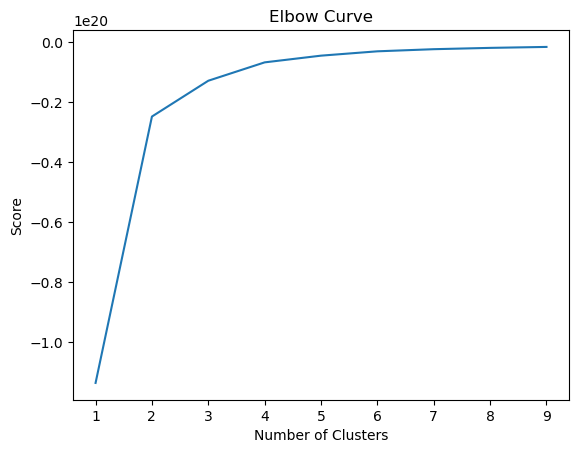

In [62]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### NOTE: numbers of clusters
we see with the elbow curve that 3 clusters would be the best

# k-means clustering

In [75]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 2) 

In [78]:
# Fit the k-means object to the data.
kmeans.fit(df_num)

/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [79]:
df_num['clusters'] = kmeans.fit_predict(df_num)
df_num.head()

/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/xh/_q4grmbx5wv2fs3fc3vrkwmc0000gn/T/ipykernel_10434/103713505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['clusters'] = kmeans.fit_predict(df_num)


,id_transaction,year,price,price_m2,id_city,postcode,departement,n_rooms,living_area,latitude,longitude,clusters
0,332948,2014,173020.0,2403.055556,202,1150,01,4,72,45.899056,5.354210,0
1,328900,2014,157500.0,1529.126214,451,1440,01,4,103,46.236407,5.262935,0
2,326170,2014,112000.0,1435.897436,365,1290,01,3,78,46.260087,4.918587,0
3,328585,2014,197000.0,2345.238095,427,1600,01,4,84,45.942301,4.770694,0
4,335040,2014,126000.0,1135.135135,283,1100,01,4,111,46.258411,5.640810,0


In [80]:
df_num['clusters'].value_counts()

clusters
0    3744319
1    3705217
Name: count, dtype: int64

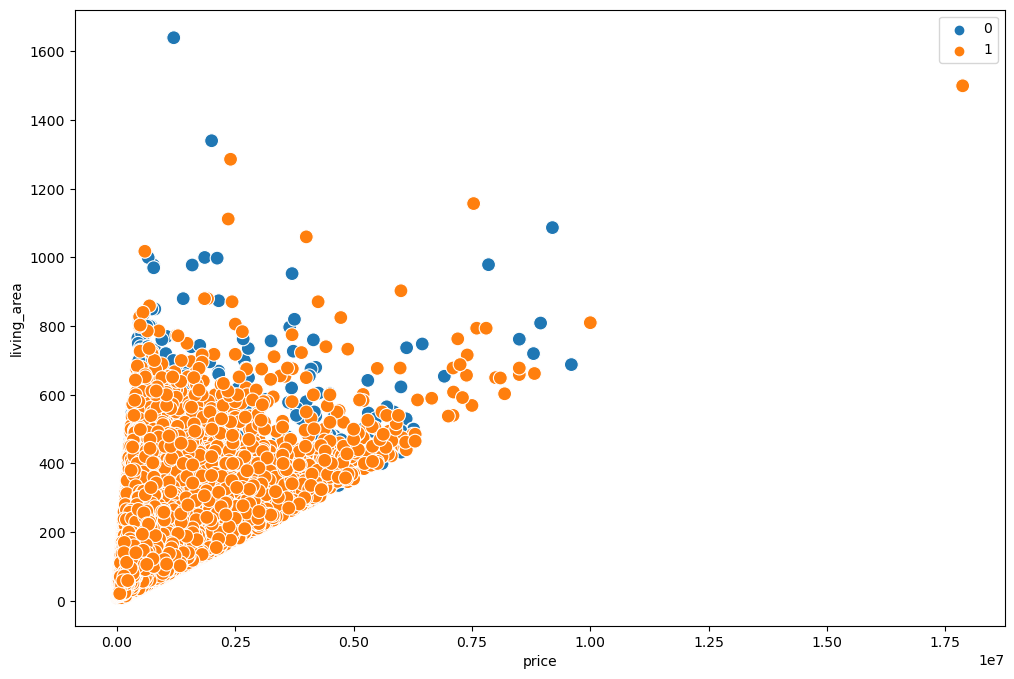

In [81]:
# Plot the clusters for the "price" & "living area" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['price'], y=df['living_area'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('price') # Label x-axis.
plt.ylabel('living_area') # Label y-axis.
plt.show()

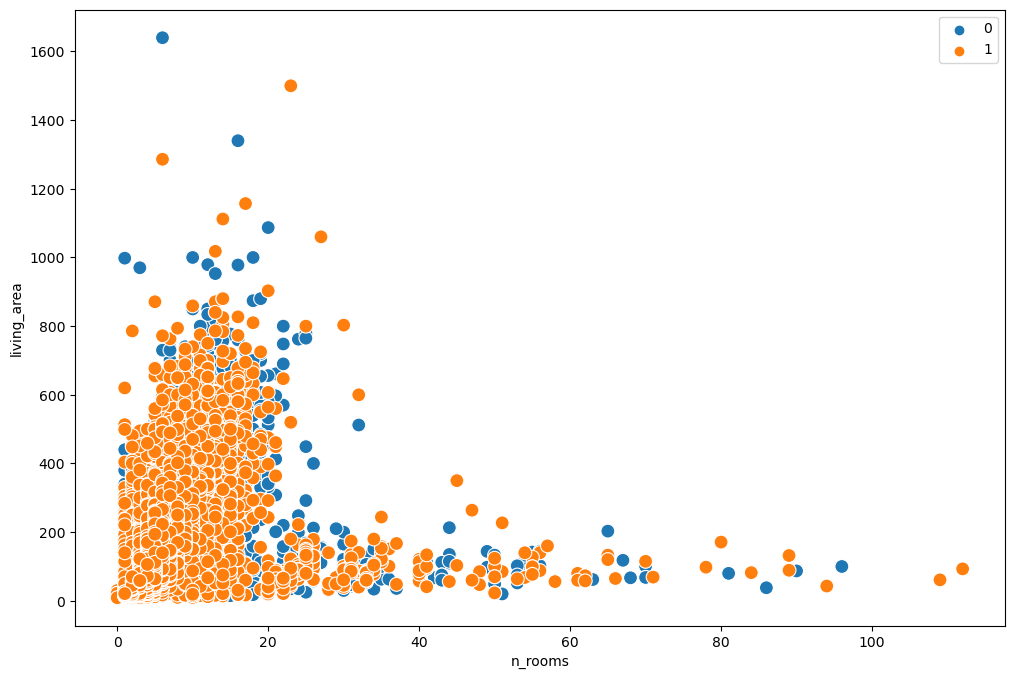

In [82]:

# Plot the clusters for the "numbers of rooms" & "living area" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['n_rooms'], y=df['living_area'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('n_rooms')
plt.ylabel('living_area')
plt.show()

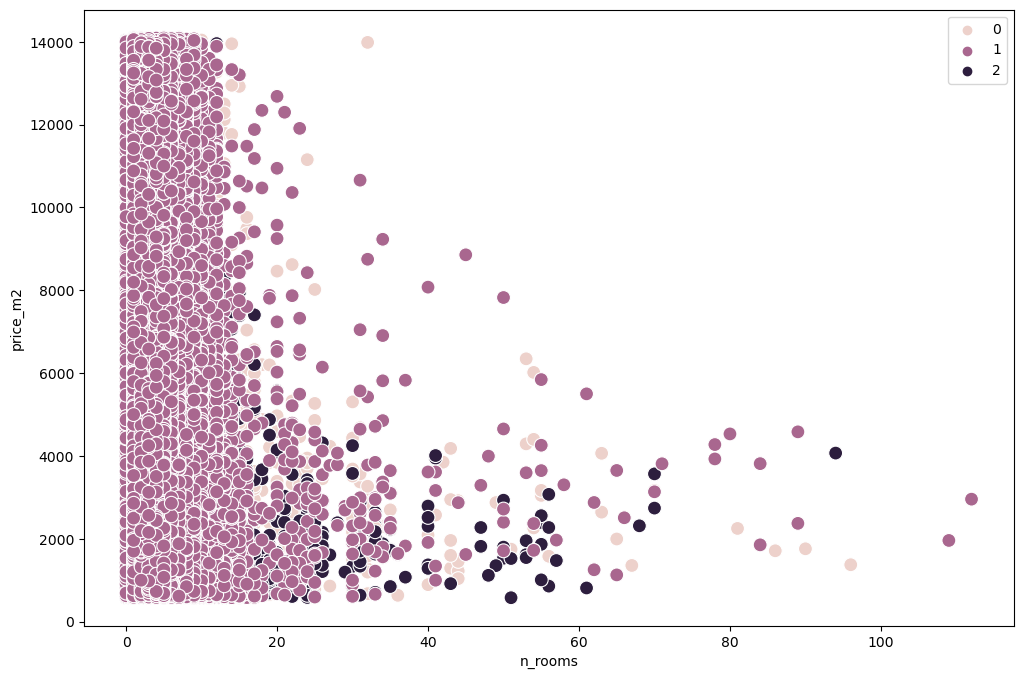

In [74]:

# Plot the clusters 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['n_rooms'], y=df['price_m2'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('n_rooms')
plt.ylabel('price_m2')
plt.show()

In [69]:
# defining clusters colors
df_num.loc[df_num['clusters'] == 2, 'cluster'] = 'dark purple'
df_num.loc[df_num['clusters'] == 1, 'cluster'] = 'purple'
df_num.loc[df_num['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/xh/_q4grmbx5wv2fs3fc3vrkwmc0000gn/T/ipykernel_10434/1305130566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.loc[df_num['clusters'] == 2, 'cluster'] = 'dark purple'


In [70]:
df_num.groupby('cluster').agg({'n_rooms':['mean', 'median'], 
                         'living_area':['mean', 'median'], 
                         'price':['mean', 'median'],
                          'price_m2':['mean', 'median']})

n_rooms        living_area                 price            \
                 mean median        mean median           mean    median   
cluster                                                                    
dark purple  3.511596    3.0   82.602355   77.0  199798.204004  160000.0   
pink         3.771769    4.0   87.428341   82.0  176654.032570  150000.0   
purple       3.375525    3.0   76.835558   70.0  267548.732392  207000.0   

                price_m2               
                    mean       median  
cluster                                
dark purple  2565.506532  2222.222222  
pink         2123.602490  1875.000000  
purple       3836.768672  3133.333333

In [72]:
df_num.shape

(7449536, 13)

# Export

In [87]:
# export in pickle
df.to_pickle(os.path.join(path,'prepared_data', 'transactions_V4'))